<center>
<h1><b>Lab 7</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>October 15, 2020</b></h3>
<hr>
</center>

### Imports

In [28]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Settings

In [29]:
np.set_printoptions(sign=' ', linewidth=100, precision=4, suppress=True)
plt.style.use('dark_background')

### Load External Files

In [30]:
%run src/laplacian.py
%run src/jacobi.py
%run src/gauss_seidel.py
%run src/sor.py
%run src/ssor.py
%run src/analytic.py
%run src/compose_soln.py

### Parameters

In [31]:
N = 500
V = 1
Li, Lj = 1, 1
n = 50
skip = int(n/25)

### Setup

In [32]:
i = np.linspace(0, Li, n)
j = np.linspace(0, Lj, n)
ii, jj = np.meshgrid(i, j, indexing='ij')

PDE = -laplacian_2d(n)

b = np.zeros_like(PDE[:,1])
b[:n-2] = np.repeat(-V, n - 2)
b[-n+2:] = np.repeat(V, n - 2)

x_init = np.random.random(b.size)

## Analytic Solution

Laplace Equation:
$$\nabla^2\phi=\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=0$$
$$\Downarrow$$
$$\phi_{xx}+\phi_{yy}=0$$
<hr>

Solution:

$$\phi\left(x,y\right)=\sum_{n=1}^{\infty}c_{n}\sin\left(\frac{n\pi x}{H}\right)\frac{\sinh\left(\frac{n\pi}{H}\left(L-y\right)\right)}{\sinh\left(\frac{n\pi L}{H}\right)}+\sum_{n=1}^{\infty}d_{n}\sin\left(\frac{n\pi x}{H}\right)\frac{\sinh\left(\frac{n\pi y}{H}\right)}{\sinh\left(\frac{n\pi L}{H}\right)}$$

$$c_{n}=\frac{-2V}{H}\int_{0}^{H}\sin\left(\frac{n\pi x}{H}\right)dx=\frac{2V}{n\pi}\left(\left(-1\right)^{n}-1\right)$$

$$d_{n}=\frac{2V}{H}\int_{0}^{H}\sin\left(\frac{n\pi x}{H}\right)dx=-\frac{2V}{n\pi}\left(\left(-1\right)^{n}-1\right)$$

$$\Downarrow$$

$$\phi\left(x,y\right)=\frac{2V}{\pi}\left(\sum_{n=1}^{\infty}\frac{\left((-1)^n-1\right)}{n}\sin\left(\frac{n\pi x}{H}\right)\frac{\sinh\left(\frac{n\pi}{H}\left(L-y\right)\right)}{\sinh\left(\frac{n\pi L}{H}\right)}-\sum_{n=1}^{\infty}\frac{\left((-1)^n-1\right)}{n}\sin\left(\frac{n\pi x}{H}\right)\frac{\sinh\left(\frac{n\pi y}{H}\right)}{\sinh\left(\frac{n\pi L}{H}\right)}\right)$$
<hr>

#### Simulation

In [33]:
soln = analytic(i, j, 25, Li, Lj, V)

#### Post-Analysis

In [34]:
grad_analytic_i, grad_analytic_j = np.gradient(soln.T, i, j)

### Plotting

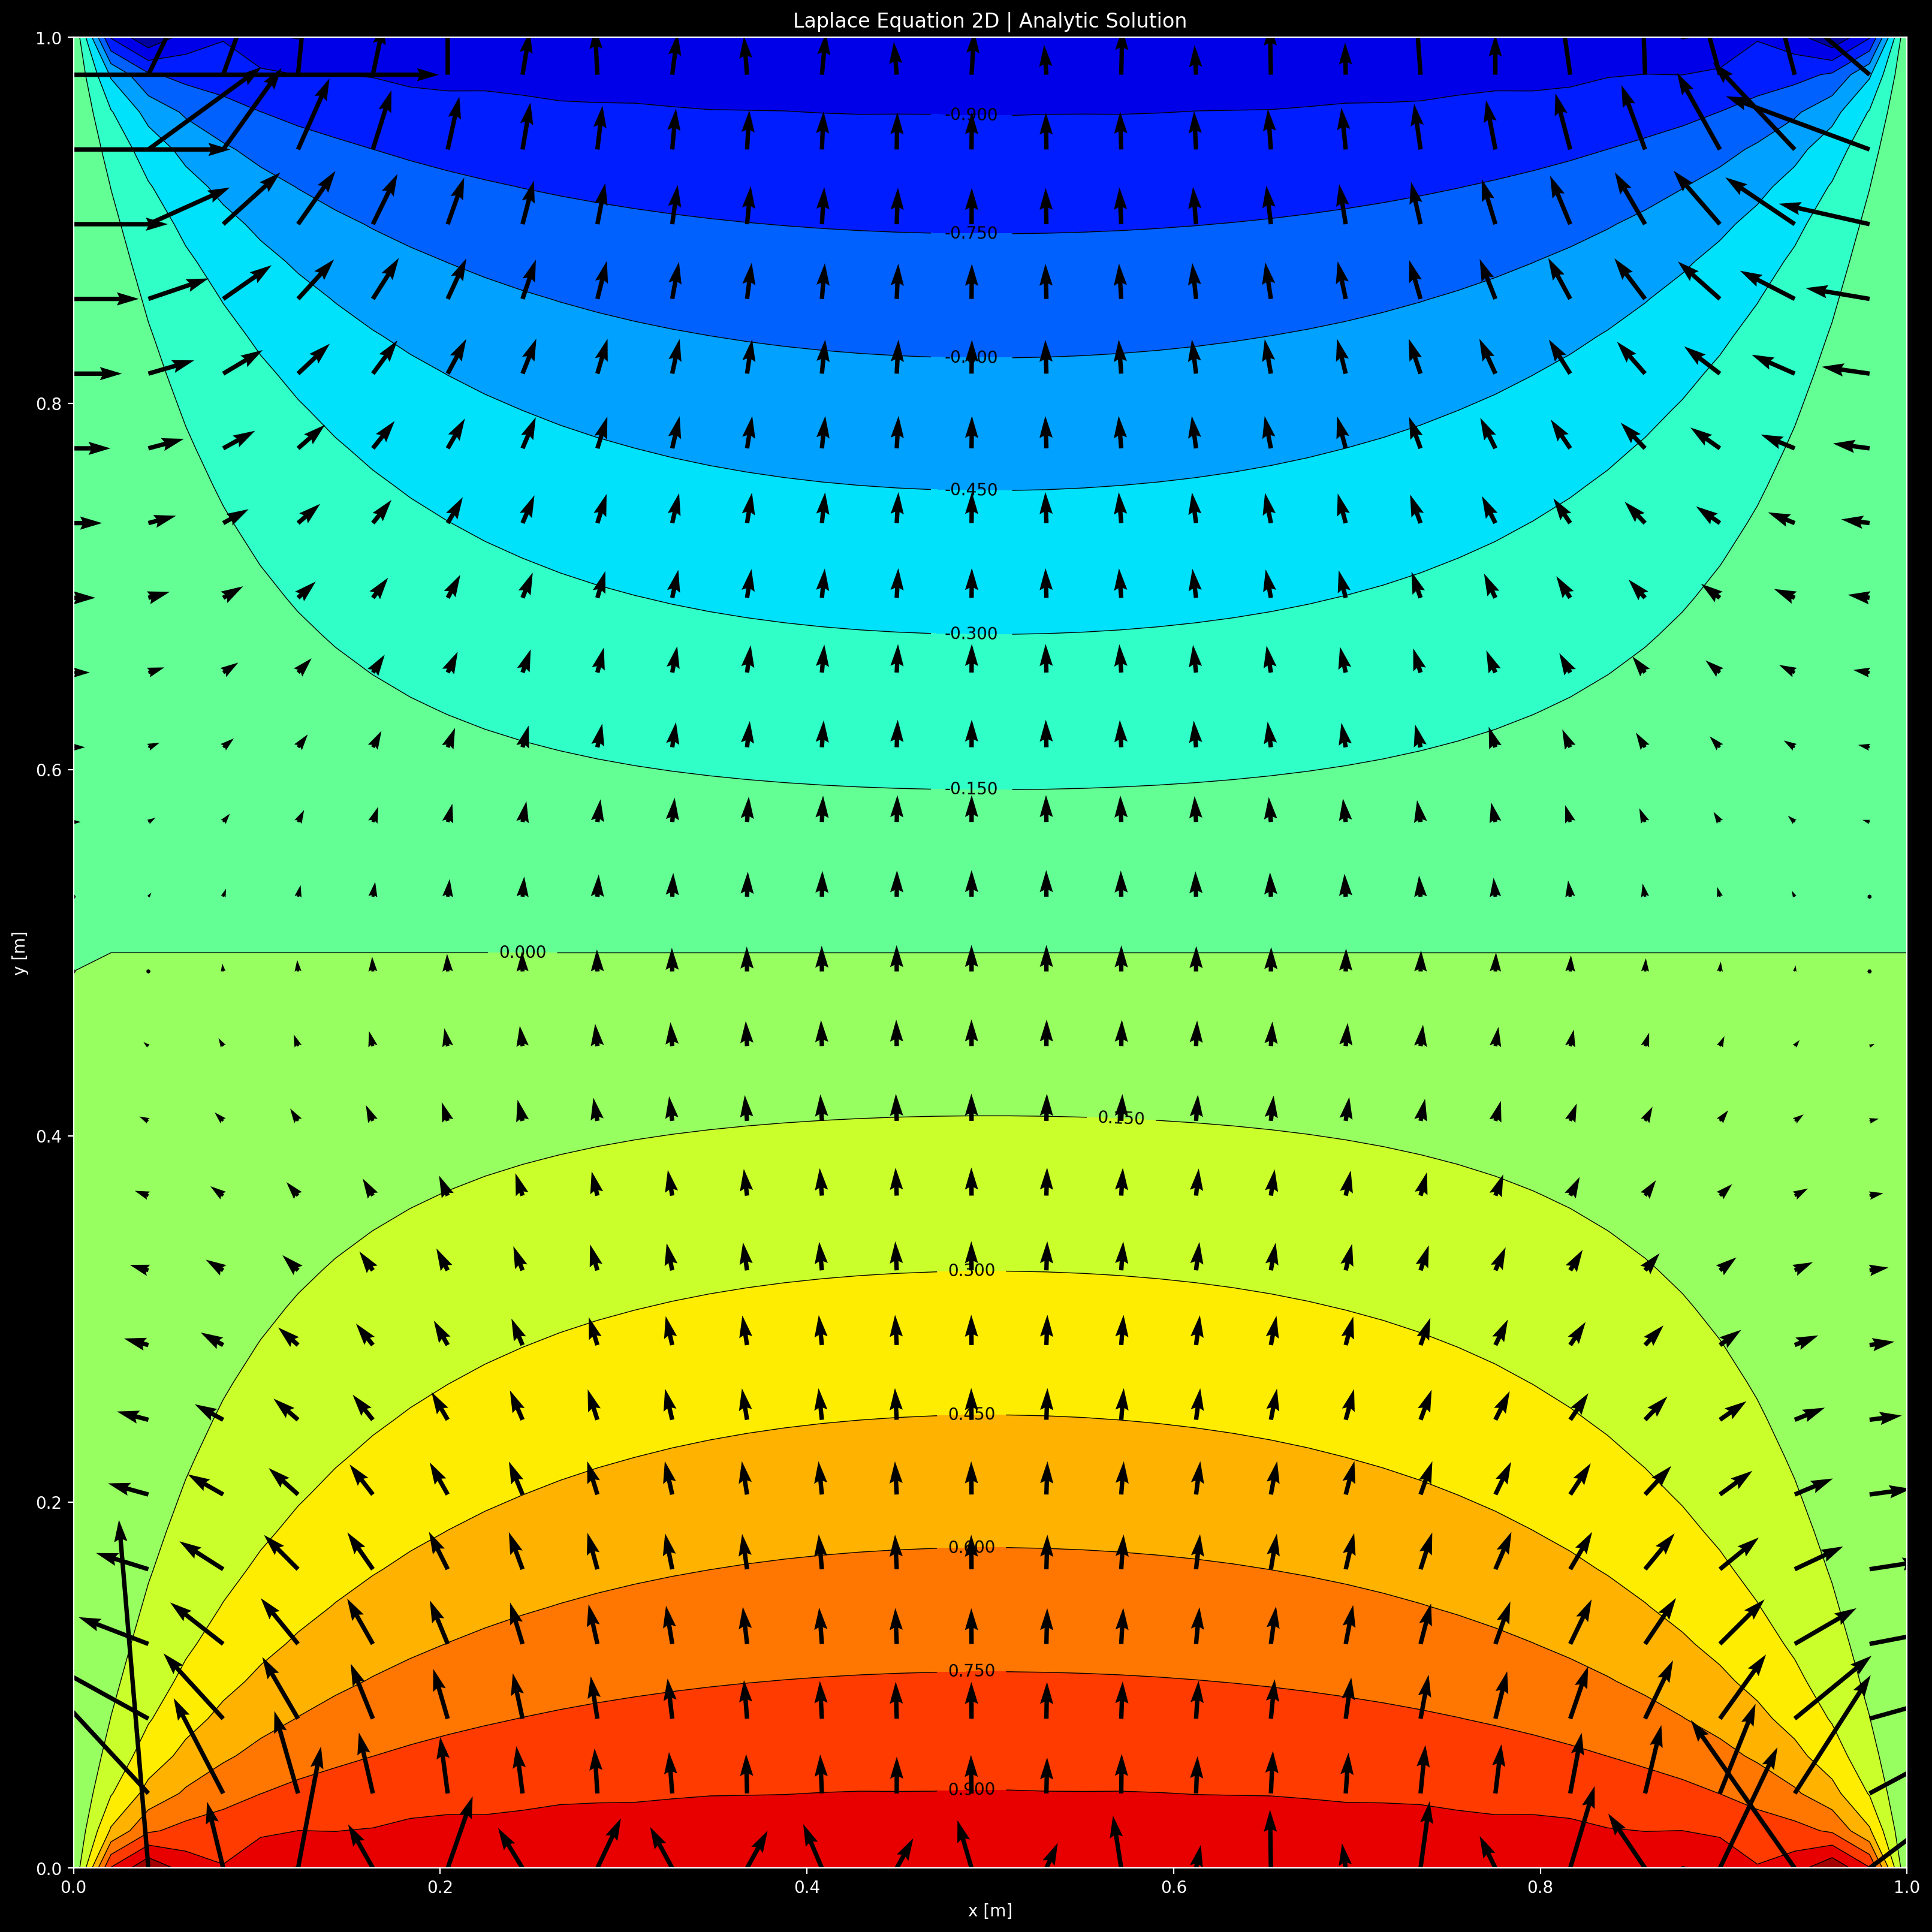

In [35]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
contour = ax.contourf(jj, ii, soln.T, levels=20, linestyles = 'solid', cmap=plt.cm.jet)
contour_lines = ax.contour(jj, ii, soln.T, levels=20, linestyles = 'solid', linewidths=0.5, colors='k')
contour_line_labels = plt.clabel(contour_lines, colors='k')
quiver = ax.quiver(
    jj[::skip, ::skip], 
    ii[::skip, ::skip], 
    -grad_analytic_j[::skip, ::skip], 
    -grad_analytic_i[::skip, ::skip])

ax.set_title('Laplace Equation 2D | Analytic Solution')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.savefig('plots/analytic_solution.png')

<hr>

# Problem 1
Use the starter program `capacitor_Jacobi.py` (or its Matlab version, or your equivalent program) to solve the Laplace equation for a parallel-plate capacitor using the Jacobi relaxation algorithm (the Matlab version has two source files, `capacitor_Jacobi.m` and `capacitor_update_Jacobi.m`). In the z direction, the plates are assumed to extend from $z=−\infty\to\infty$ (translational symmetry), so the problem is only two-dimensional. Calculate and plot the potential surfaces, equipotential contours and the electric field (cf.pp.140-141 in the textbook). How many iterations (sweeps through the lattice) are required as a function of the mesh size to reach a given level of accuracy? At fixed mesh size, how does the total number of iterations needed depend on the desired accuracy? Compare your convergence results with the theoretical expectations. 
<hr>

### Simulation

In [9]:
x = jacobi(PDE, b, x_init)

### Post-Analysis

In [10]:
A = np.zeros((n, n))
A[0, :] = V * np.ones(n)
A[-1, :] = -V * np.ones(n)
A[1:-1,1:-1] = x.reshape((n-2,n-2))

grad_A_i, grad_A_j = np.gradient(A, i, j)

### Plotting

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
contour = ax.contourf(jj, ii, A, levels=20, linestyles = 'solid', cmap=plt.cm.jet)
contour_lines = ax.contour(jj, ii, A, levels=20, linestyles = 'solid', linewidths=0.5, colors='k')
contour_line_labels = plt.clabel(contour_lines, colors='k')
quiver = ax.quiver(
    jj[::skip, ::skip], 
    ii[::skip, ::skip], 
    -grad_A_j[::skip, ::skip],
    -grad_A_i[::skip, ::skip])

ax.set_title('Laplace Equation 2D | Jacobi Method')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.savefig('plots/P1_plot.png')

### Accuracy Analysis

#### Number of Jacobi Iterations

In [12]:
num_iterations = np.linspace(100, 1500, 25)
norms = []
for _N in tqdm(num_iterations):
    x = jacobi(PDE, b, x_init, max_iter=_N)
    A = compose_soln(x, n, V)
    norms.append(np.linalg.norm(A-soln.T))

100%|██████████| 25/25 [00:52<00:00,  2.10s/it]


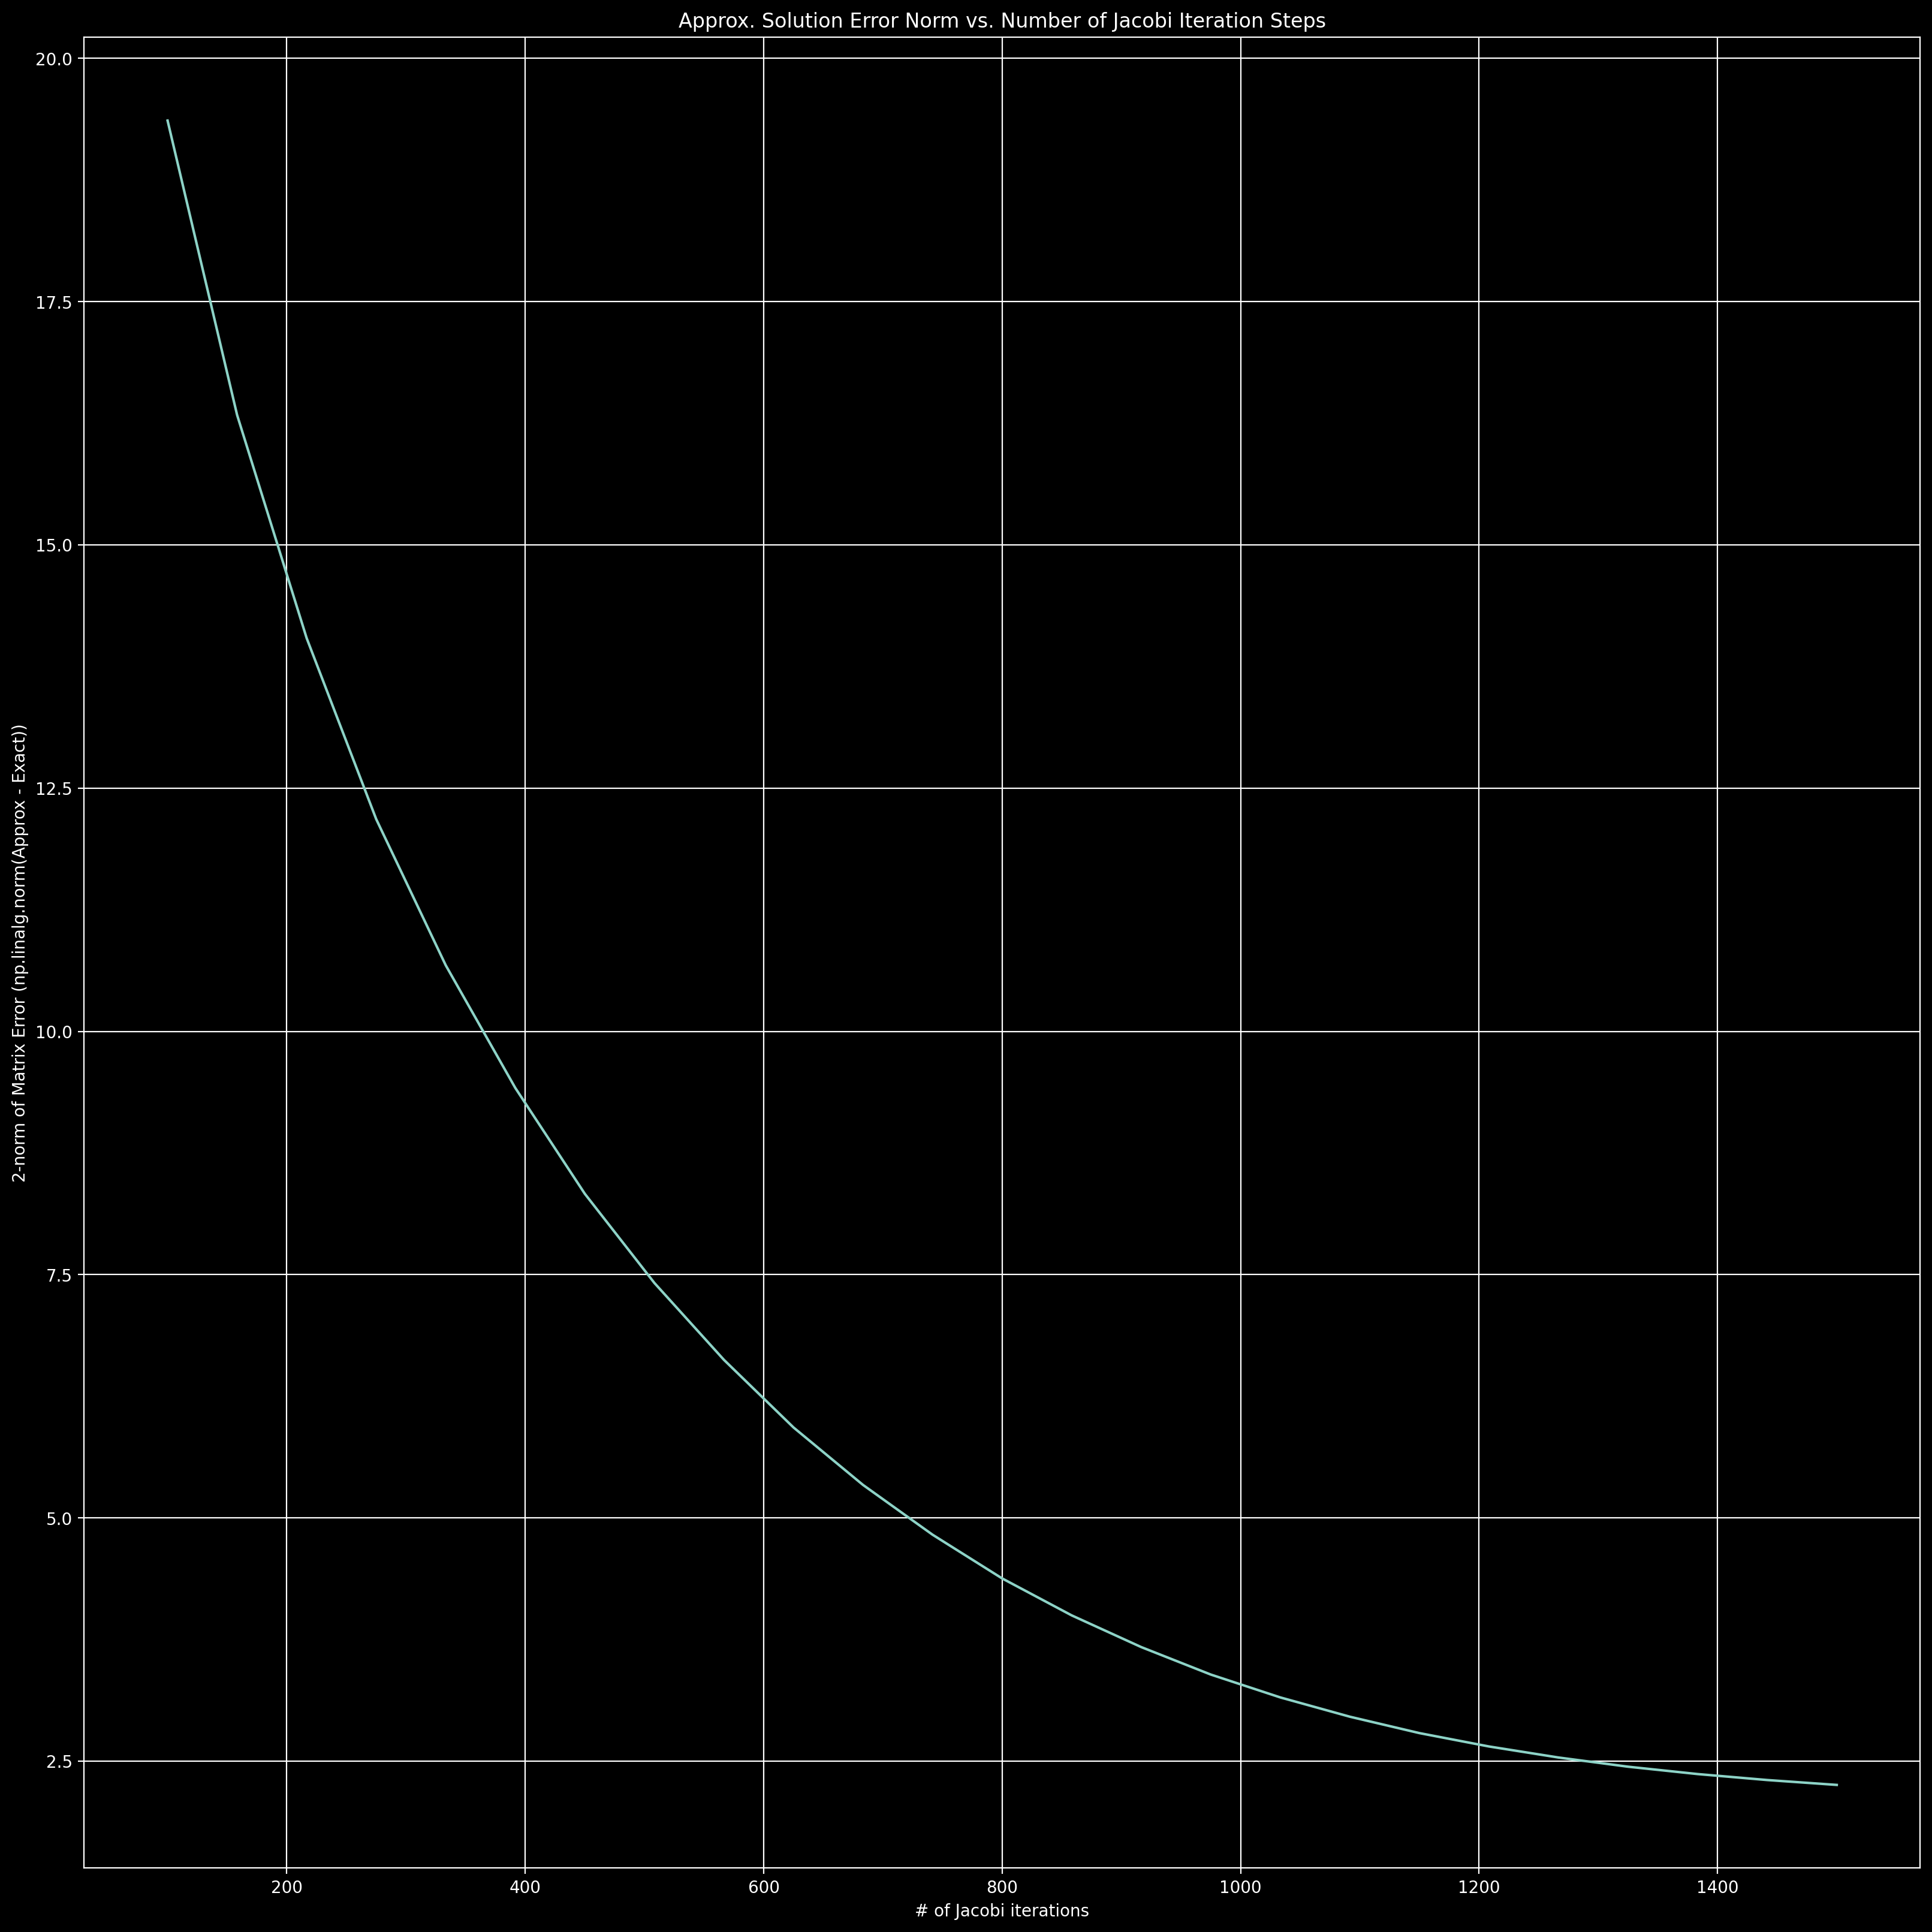

In [13]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
plot = ax.plot(num_iterations, norms)

ax.set_title(r'Approx. Solution Error Norm vs. Number of Jacobi Iteration Steps')
ax.set_xlabel('# of Jacobi iterations')
ax.set_ylabel('2-norm of Matrix Error (np.linalg.norm(Approx - Exact))')
ax.grid()
plt.savefig('plots/P1_error_analysis_iteration_steps.png')

#### Grid Size

In [14]:
num_points = np.arange(5, 50, 1)
norms = []
for n in tqdm(num_points):
    # Recalculate Mesh and reconstruct matrices/vectors
    i = np.linspace(0, Li, n)
    j = np.linspace(0, Lj, n)
    ii, jj = np.meshgrid(i, j, indexing='ij')
    PDE = -laplacian_2d(n)
    b = np.zeros_like(PDE[:,1])
    b[:n-2] = np.repeat(-V, n - 2)
    b[-n+2:] = np.repeat(V, n - 2)
    x_init = np.random.random(b.size)
    
    # Rerun the simulation with the new mesh
    x_approx = jacobi(PDE, b, x_init, max_iter=_N)
    A = compose_soln(x_approx, n, V)
    soln = analytic(i, j, 25, Li, Lj, V)
    norms.append(np.linalg.norm(A-soln.T))

100%|██████████| 45/45 [01:08<00:00,  1.53s/it]


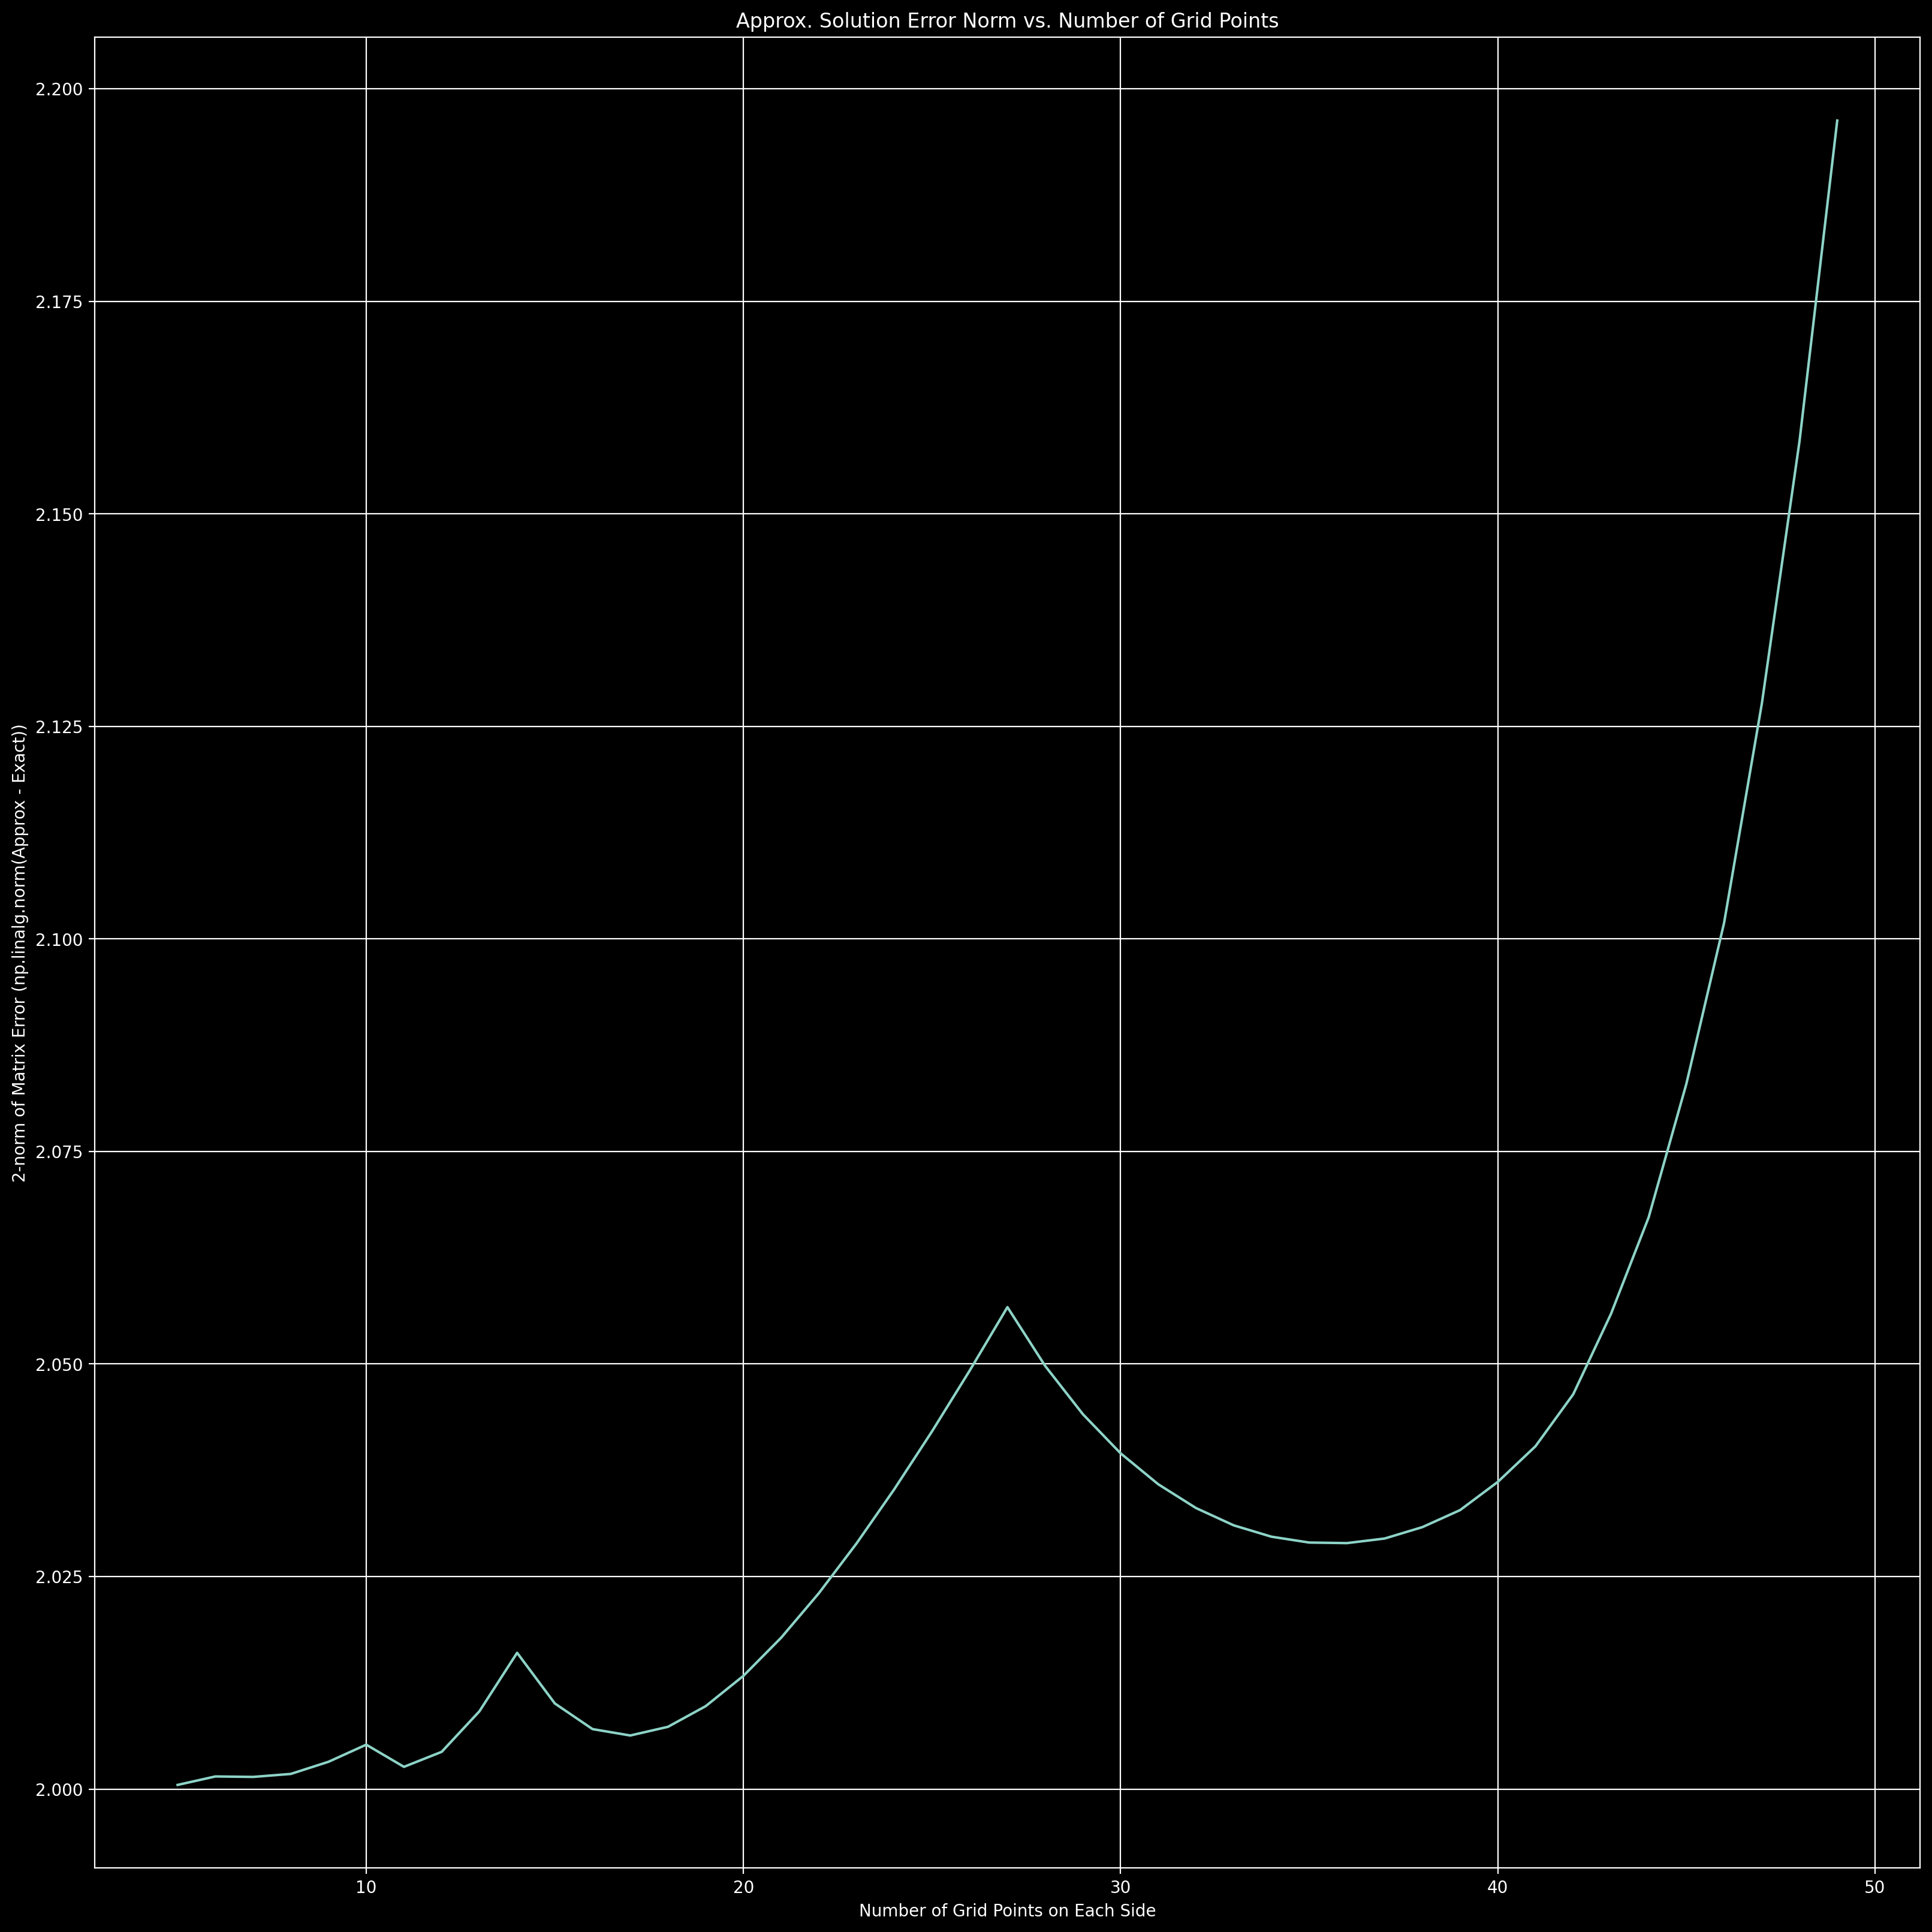

In [15]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
plot = ax.plot(num_points, norms)

ax.set_title(r'Approx. Solution Error Norm vs. Number of Grid Points')
ax.set_xlabel(r'Number of Grid Points on Each Side')
ax.set_ylabel('2-norm of Matrix Error (np.linalg.norm(Approx - Exact))')
ax.grid()
plt.savefig('plots/P1_error_analysis_grid_size.png')

# Problem 2
Implement the Gauss-Seidel method to solve the same capacitor problem as in (1). Calculate the potential and analyze any differences in convergence compared to what you found for the Jacobi algorithm in (1).

### Simulation

In [16]:
x = gauss_seidel(PDE, b, x_init)

### Post-Analysis

In [17]:
A = np.zeros((n, n))
A[0, :] = V * np.ones(n)
A[-1, :] = -V * np.ones(n)
A[1:-1,1:-1] = x.reshape((n-2,n-2))

grad_A_i, grad_A_j = np.gradient(A, i, j)

### Plotting

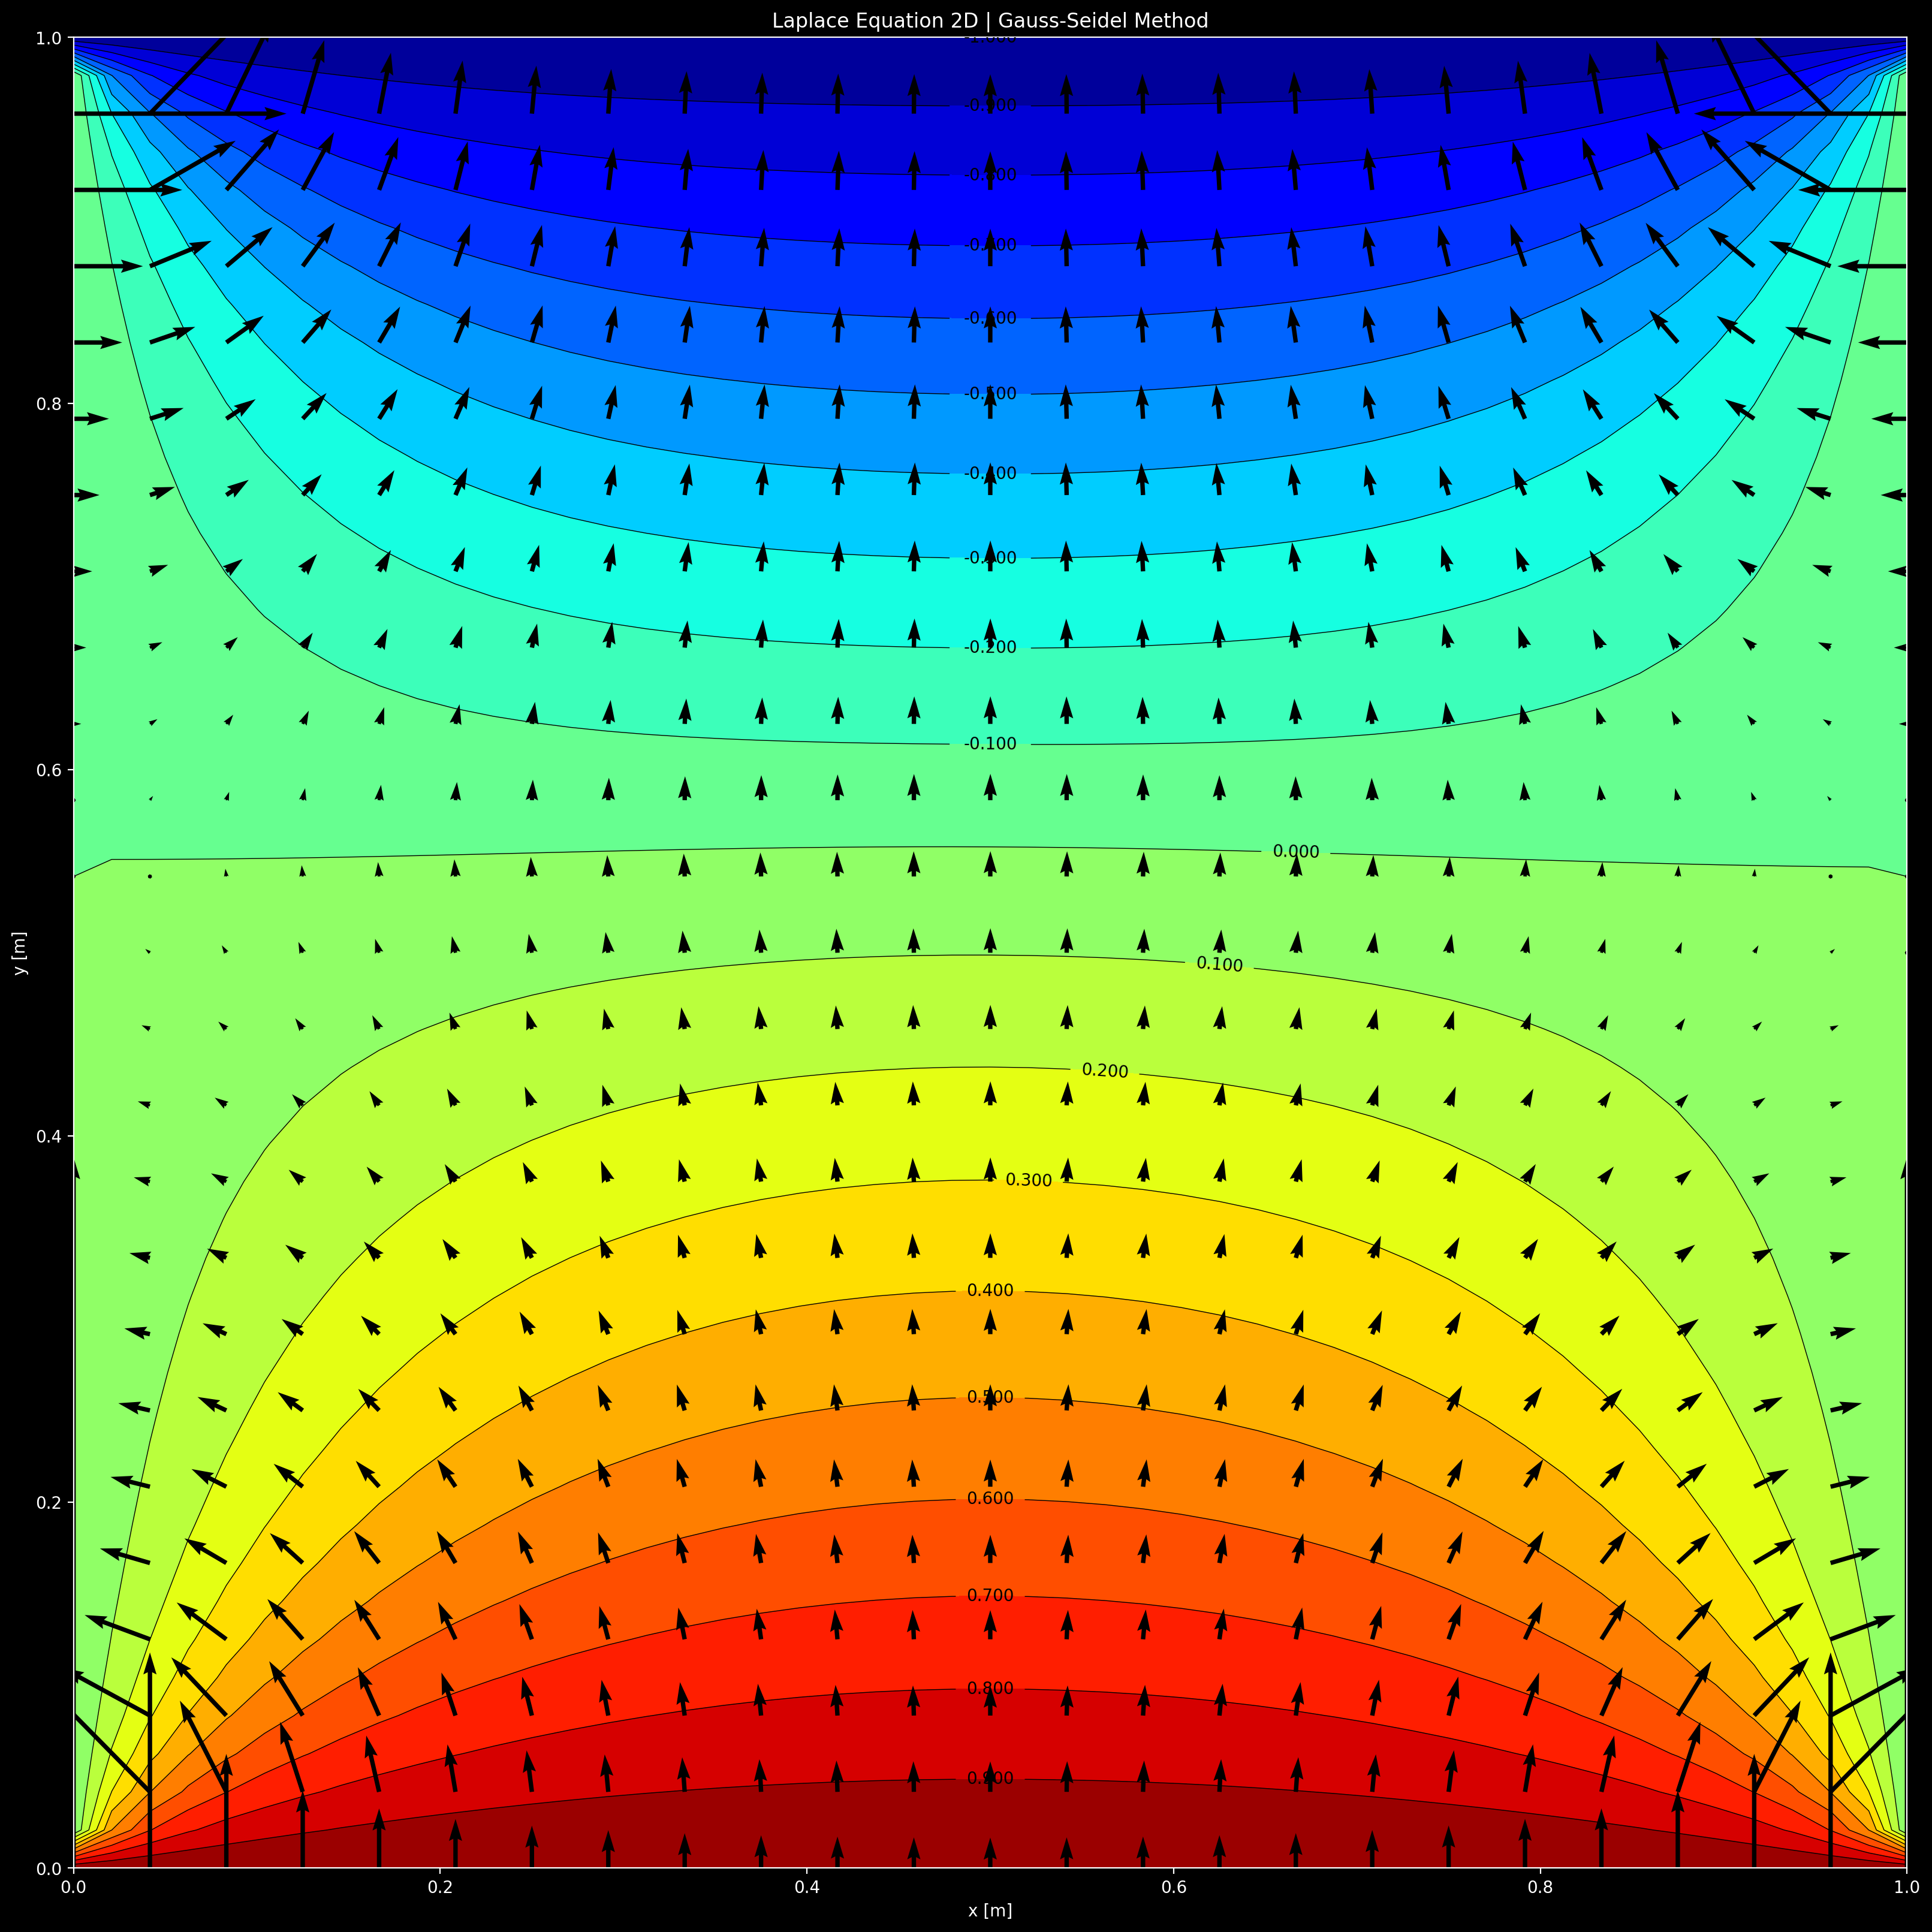

In [18]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
contour = ax.contourf(jj, ii, A, levels=20, linestyles = 'solid', cmap=plt.cm.jet)
contour_lines = ax.contour(jj, ii, A, levels=20, linestyles = 'solid', linewidths=0.5, colors='k')
contour_line_labels = plt.clabel(contour_lines, colors='k')
quiver = ax.quiver(
    jj[::skip, ::skip], 
    ii[::skip, ::skip], 
    -grad_A_j[::skip, ::skip], 
    -grad_A_i[::skip, ::skip])

ax.set_title('Laplace Equation 2D | Gauss-Seidel Method')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.savefig('plots/P2_plot.png')

### Accuracy Analysis

#### Number of Gauss-Seidel Iterations

In [19]:
num_iterations = np.linspace(100, 1500, 25)
norms = []
for _N in tqdm(num_iterations):
    x = gauss_seidel(PDE, b, x_init, max_iter=_N)
    A = compose_soln(x, n, V)
    norms.append(np.linalg.norm(A-soln.T))

100%|██████████| 25/25 [01:29<00:00,  3.57s/it]


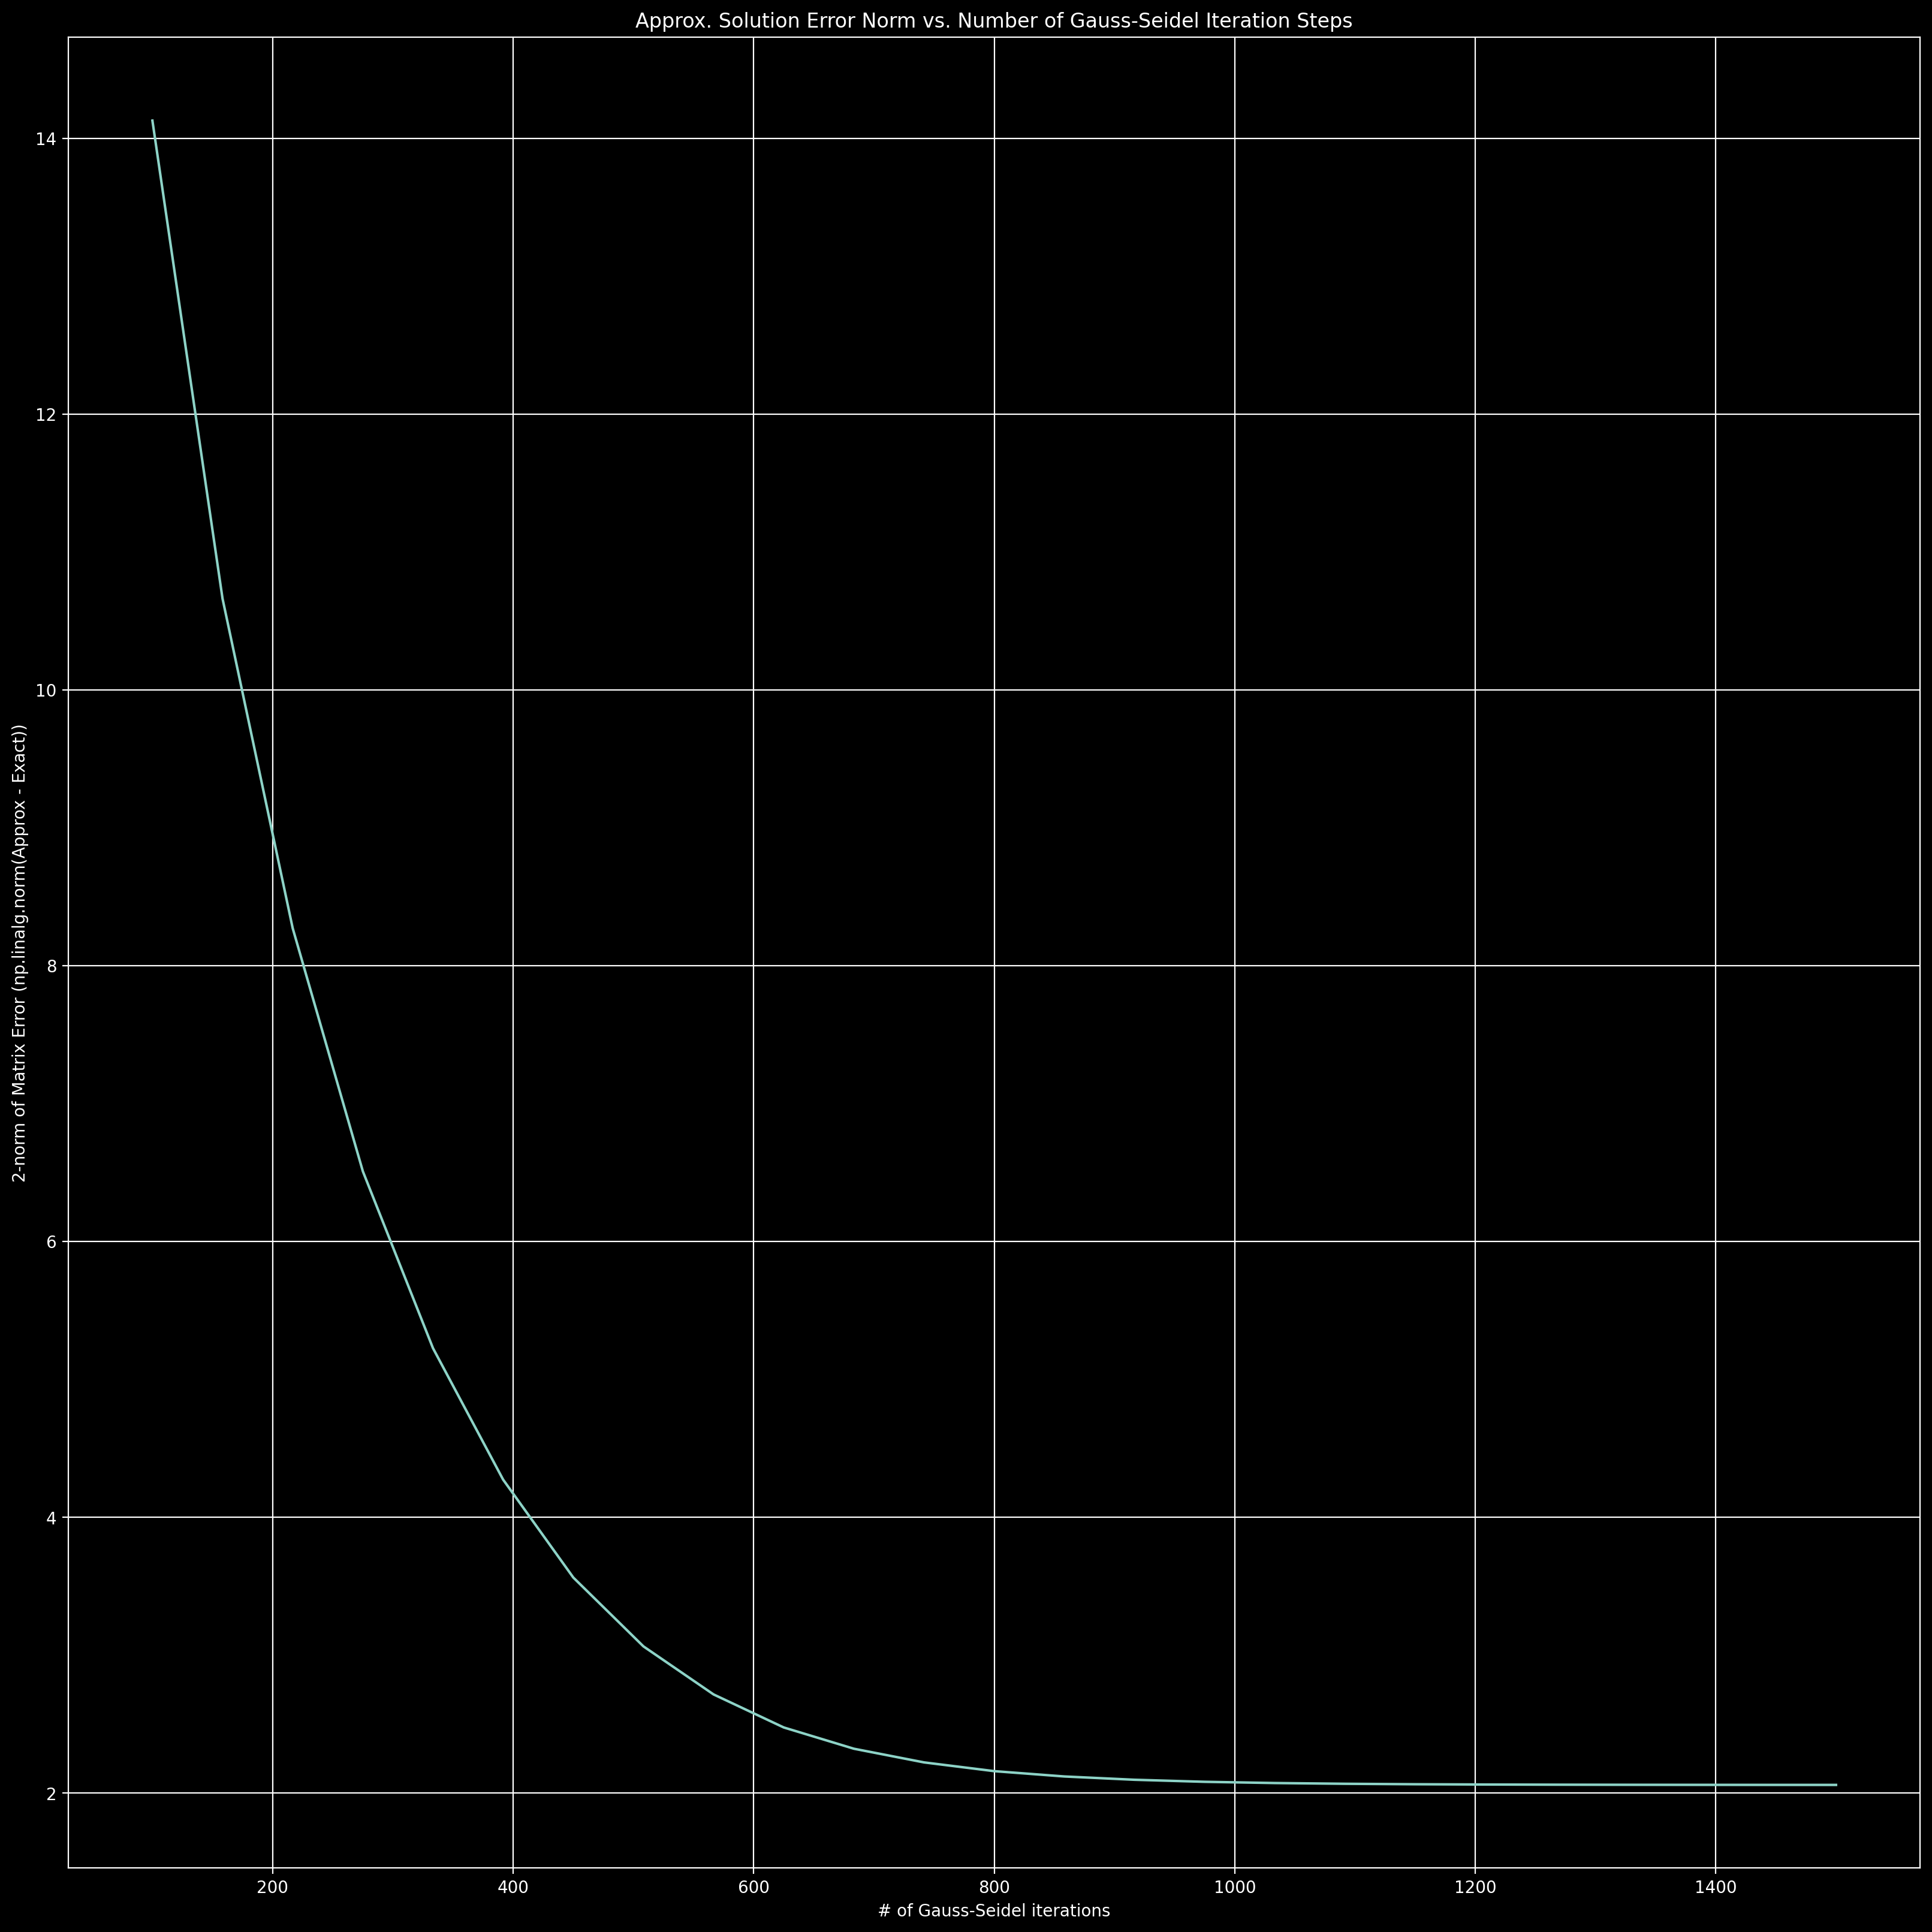

In [20]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
plot = ax.plot(num_iterations, norms)

ax.set_title(r'Approx. Solution Error Norm vs. Number of Gauss-Seidel Iteration Steps')
ax.set_xlabel('# of Gauss-Seidel iterations')
ax.set_ylabel('2-norm of Matrix Error (np.linalg.norm(Approx - Exact))')
ax.grid()
plt.savefig('plots/P2_error_analysis_iteration_steps.png')

#### Grid Size

In [21]:
num_points = np.arange(5, 50, 1)
norms = []
for n in tqdm(num_points):
    # Recalculate Mesh and reconstruct matrices/vectors
    i = np.linspace(0, Li, n)
    j = np.linspace(0, Lj, n)
    ii, jj = np.meshgrid(i, j, indexing='ij')
    PDE = -laplacian_2d(n)
    b = np.zeros_like(PDE[:,1])
    b[:n-2] = np.repeat(-V, n - 2)
    b[-n+2:] = np.repeat(V, n - 2)
    x_init = np.random.random(b.size)
    
    # Rerun the simulation with the new mesh
    x_approx = gauss_seidel(PDE, b, x_init, max_iter=_N)
    A = compose_soln(x_approx, n, V)
    soln = analytic(i, j, 25, Li, Lj, V)
    norms.append(np.linalg.norm(A-soln.T))

100%|██████████| 45/45 [01:23<00:00,  1.85s/it]


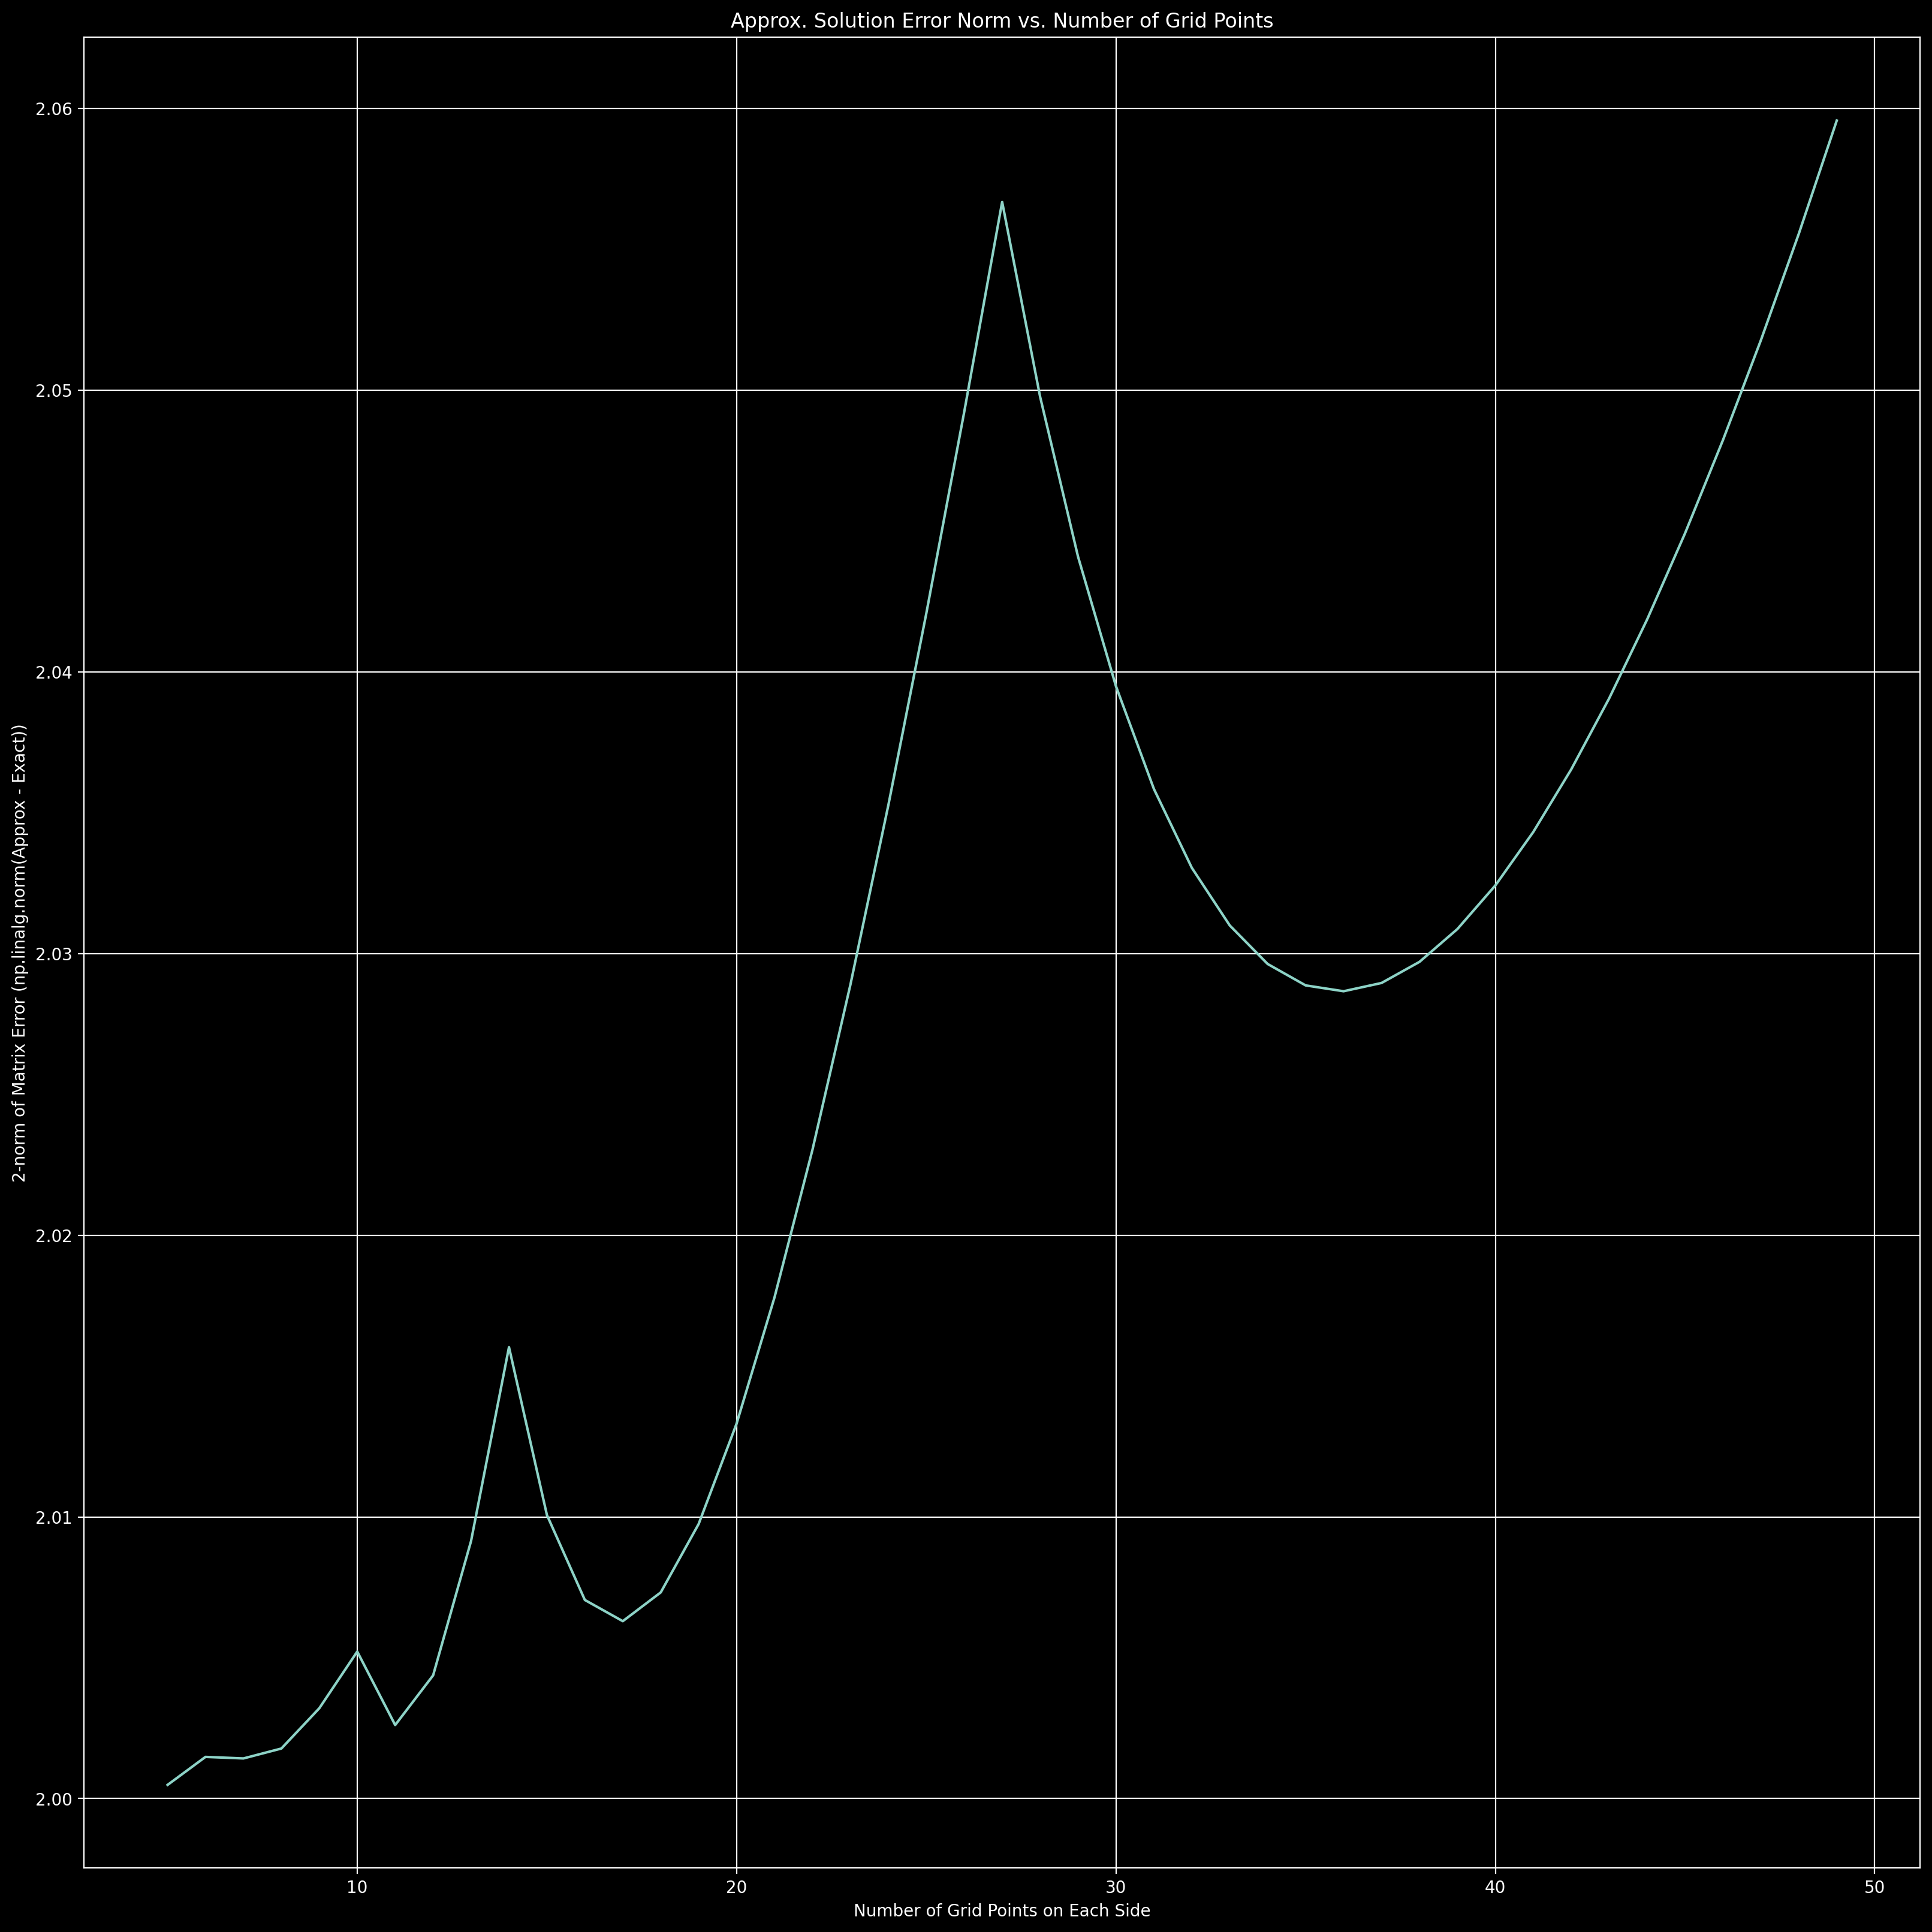

In [22]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
plot = ax.plot(num_points, norms)

ax.set_title(r'Approx. Solution Error Norm vs. Number of Grid Points')
ax.set_xlabel(r'Number of Grid Points on Each Side')
ax.set_ylabel('2-norm of Matrix Error (np.linalg.norm(Approx - Exact))')
ax.grid()
plt.savefig('plots/P2_error_analysis_grid_size.png')

# Problem 3
Numerically solve the Poisson equation for the capacitor problem in (1) by introducing a term $\frac{\rho}{\epsilon_0}$ on the right hand side of the two-dimensional Laplace equation, at your favorite location away from the capacitor and the boundaries. Calculate the electric potentials and fields in this case using any of the three methods discussed so far (see Section 5.2 for how to include charge in the calculation). Compare with theoretical expectations in limiting cases where that is possible (where you can). Explain what the constant term you added corresponds to physically in this 2D calculation; is this a true point charge?

In [23]:
N = 500
V = 1
Li = Lj = 1
n = 50
dx = dy = Li / n
skip = int(n/25)

In [24]:
i = np.linspace(0, Li, n)
j = np.linspace(0, Lj, n)
ii, jj = np.meshgrid(i, j, indexing='ij')

PDE = -laplacian_2d(n)

b = np.zeros_like(PDE[:,1])   
b[:n-2] = np.repeat(-V, n - 2)
b[-n+2:] = np.repeat(V, n - 2)

rng = np.random.default_rng()
random_charge = rng.integers(n-2, n**2-(n-2))
b[random_charge] = dx*dy * 1*(n**2)/(Li*Lj)

x_init = np.random.random(b.size)

### Simulation

In [25]:
x = gauss_seidel(PDE, b, x_init, max_iter=1000)

### Post-Analysis

In [26]:
A = np.zeros((n, n))
A[0, :] = V * np.ones(n)
A[-1, :] = -V * np.ones(n)
A[1:-1,1:-1] = x.reshape((n-2,n-2))

grad_A_i, grad_A_j = np.gradient(A, i, j)

### Plotting

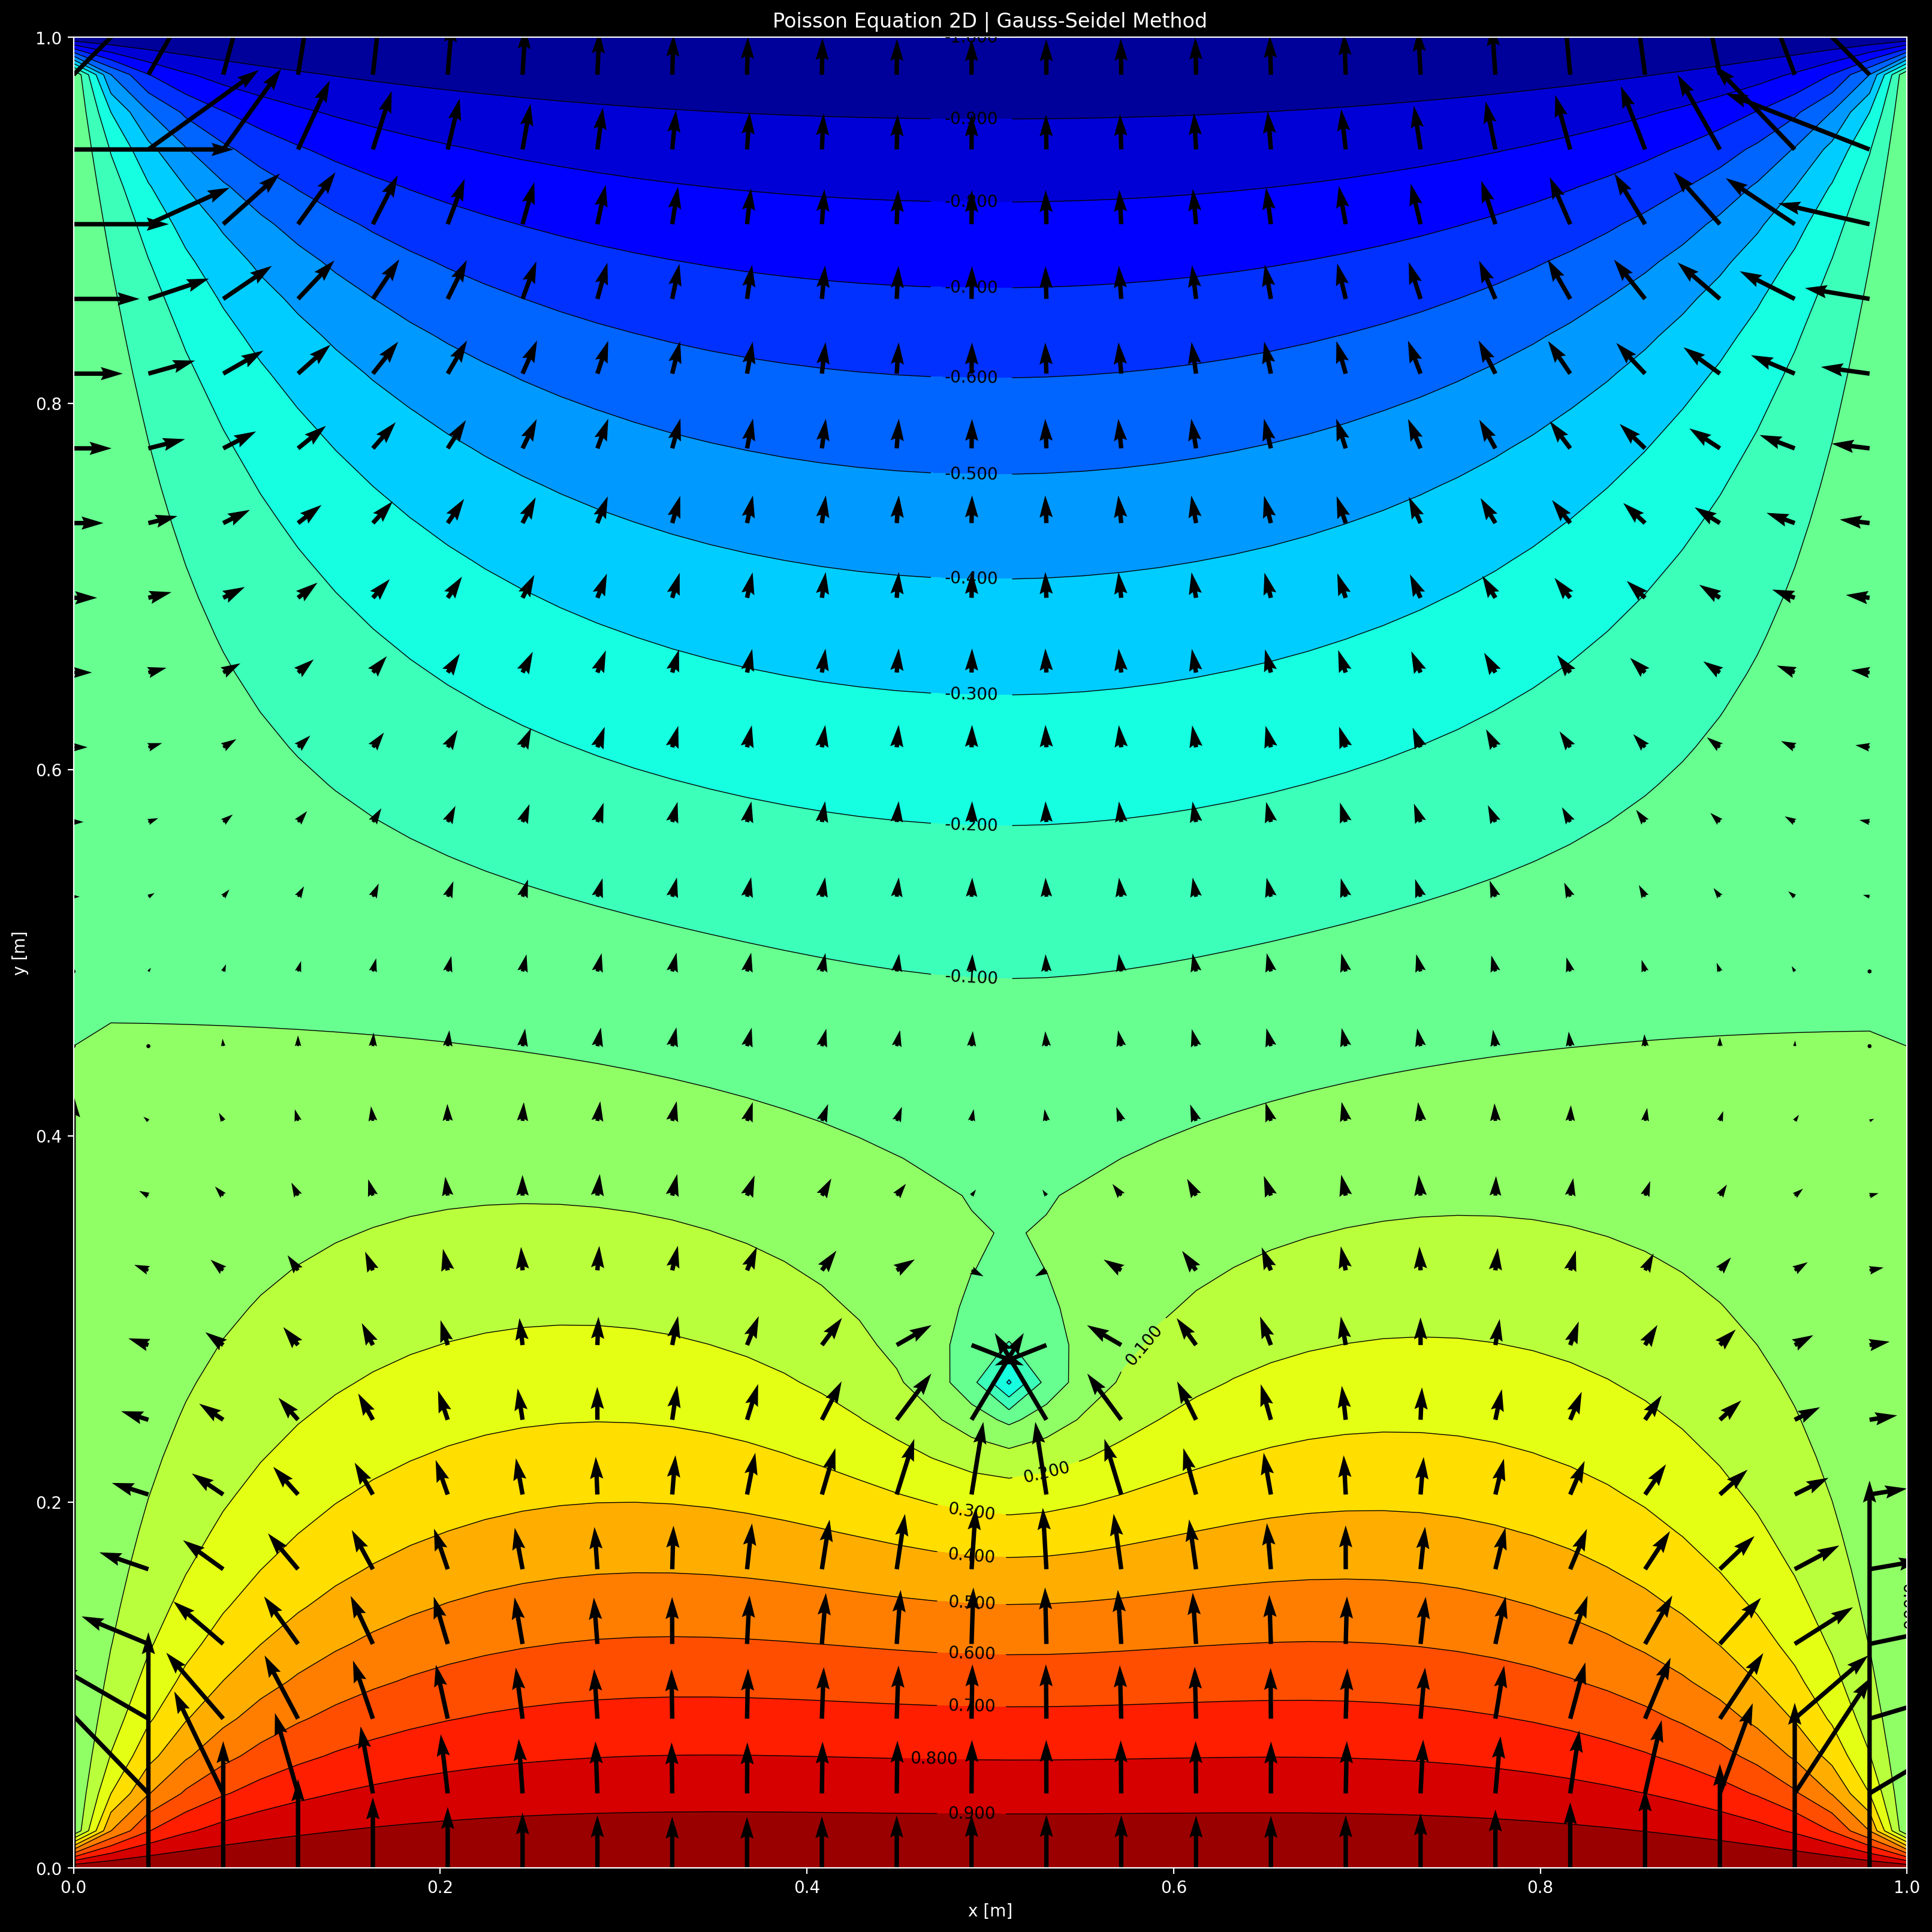

In [27]:
fig, ax = plt.subplots(1,1, figsize=(16,16), dpi=200, constrained_layout=True)
contour = ax.contourf(jj, ii, A, levels=20, linestyles = 'solid', cmap=plt.cm.jet)
contour_lines = ax.contour(jj, ii, A, levels=20, linestyles = 'solid', linewidths=0.5, colors='k')
contour_line_labels = plt.clabel(contour_lines, colors='k')
quiver = ax.quiver(
    jj[::skip, ::skip], 
    ii[::skip, ::skip], 
    -grad_A_j[::skip, ::skip], 
    -grad_A_i[::skip, ::skip])

ax.set_title('Poisson Equation 2D | Gauss-Seidel Method')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.savefig('plots/P3_plot.png')

This added term represents a charge density present in the system. This charge isn't a point charge however, as it takes up too much spatial extent in our simulation. Therefore, the true charge density that is being used is just an approximation